In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("12H.csv")
dataset = dataset.iloc[11:, :]*10**5 - 121325
openVal = dataset.iloc[:, 34]
closeVal = dataset.iloc[:, 37]
openVal = openVal
closeVal = closeVal
openVal = openVal.values
closeVal = closeVal.values
test = []
for i in range(len(openVal)):
    if closeVal[i] - openVal[i] < 0:
        test.append(0)
    else:
        test.append(1)
print(openVal)
print(closeVal)
print(test)

[-18875. -18795. -18335. ...  -9239. -10034. -10042.]
[-18815. -18315. -17965. ... -10035. -10042. -10079.]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 

In [3]:
print(max(dataset.iloc[:, 1:].max()))
print(min(dataset.iloc[:, 1:].min()))

39055.0
-39055.0


# Find high value by open value

In [4]:
x = dataset.iloc[:, 1:35].values
y = dataset.iloc[:,   35].values
y = y.reshape(len(y),1)
print(x)
print(y)

[[-20595. -19425. -20595. ... -18275. -19015. -18875.]
 [-20145. -18545. -20785. ... -18575. -19215. -18795.]
 [-18895. -18535. -19195. ... -18145. -18865. -18335.]
 ...
 [-10074.  -9624. -10074. ...  -9035.  -9384.  -9239.]
 [ -9715.  -9046.  -9773. ...  -9158. -10140. -10034.]
 [ -9068.  -8896.  -9297. ...  -9876. -10109. -10042.]]
[[-18575.]
 [-18145.]
 [-17915.]
 ...
 [ -9158.]
 [ -9876.]
 [ -9944.]]


In [5]:
from xgboost import XGBRegressor
regressorHigh = XGBRegressor()
regressorHigh.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [6]:
yPredHigh = regressorHigh.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 35]
y = y.values
print(np.concatenate((yPredHigh.reshape(len(yPredHigh), 1), y.reshape(len(y), 1)), 1))

[[-18657.37 -18575.  ]
 [-18563.93 -18145.  ]
 [-17868.12 -17915.  ]
 ...
 [ -8955.7   -9158.  ]
 [ -9675.95  -9876.  ]
 [ -9786.54  -9944.  ]]


In [7]:
from sklearn.metrics import r2_score
r2_score(y, yPredHigh)

0.9998159858100782

In [8]:
diffHigh = []
for i in range(len(y)):
    diffHigh.append(abs(y[i] - yPredHigh[i]))
print(max(diffHigh))
print(np.mean(diffHigh))

1692.3040924072266
160.84842410117508


# Find next low

In [9]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
print(x)

[[-20595.   -19425.   -20595.   ... -19015.   -18875.   -18657.37]
 [-20145.   -18545.   -20785.   ... -19215.   -18795.   -18563.93]
 [-18895.   -18535.   -19195.   ... -18865.   -18335.   -17868.12]
 ...
 [-10074.    -9624.   -10074.   ...  -9384.    -9239.    -8955.7 ]
 [ -9715.    -9046.    -9773.   ... -10140.   -10034.    -9675.95]
 [ -9068.    -8896.    -9297.   ... -10109.   -10042.    -9786.54]]


In [10]:
y = dataset.iloc[:, 36]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[-19215.]
 [-18865.]
 [-18795.]
 ...
 [-10140.]
 [-10109.]
 [-10245.]]


In [11]:
from xgboost import XGBRegressor
regressorLow = XGBRegressor()
regressorLow.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [12]:
yPredLow = regressorLow.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 36].values
print(np.concatenate((yPredLow.reshape(len(yPredLow), 1), y.reshape(len(y), 1)), 1))

[[-19442.47 -19215.  ]
 [-19442.47 -18865.  ]
 [-18791.74 -18795.  ]
 ...
 [ -9568.73 -10140.  ]
 [-10301.59 -10109.  ]
 [-10321.48 -10245.  ]]


In [13]:
from sklearn.metrics import r2_score
r2_score(y, yPredLow)

0.9998469919683297

In [14]:
diffLow = []
for i in range(len(y)):
    diffLow.append(abs(y[i] - yPredLow[i]))
print(max(diffLow))
print(np.mean(diffLow))

1581.5478515625
144.61354878587517


# Find close

In [15]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[-20595.   -19425.   -20595.   ... -18875.   -18657.37 -19442.47]
 [-20145.   -18545.   -20785.   ... -18795.   -18563.93 -19442.47]
 [-18895.   -18535.   -19195.   ... -18335.   -17868.12 -18791.74]
 ...
 [-10074.    -9624.   -10074.   ...  -9239.    -8955.7   -9568.73]
 [ -9715.    -9046.    -9773.   ... -10034.    -9675.95 -10301.59]
 [ -9068.    -8896.    -9297.   ... -10042.    -9786.54 -10321.48]]


In [16]:
y = dataset.iloc[:, 37]
y = y.values
y = y.reshape(len(y),1)
print(y)

[[-18815.]
 [-18315.]
 [-17965.]
 ...
 [-10035.]
 [-10042.]
 [-10079.]]


In [17]:
from xgboost import XGBRegressor
regressorClose = XGBRegressor()
regressorClose.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [18]:
yPredClose = regressorClose.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 37].values
print(np.concatenate((yPredClose.reshape(len(yPredClose), 1), y.reshape(len(y), 1)), 1))

[[-18522.6  -18815.  ]
 [-18397.44 -18315.  ]
 [-18389.24 -17965.  ]
 ...
 [ -9436.66 -10035.  ]
 [ -9951.51 -10042.  ]
 [-10035.17 -10079.  ]]


In [19]:
from sklearn.metrics import r2_score
r2_score(y, yPredClose)

0.9997727648127201

In [20]:
diffClose = []
for i in range(len(y)):
    diffClose.append(abs(y[i] - yPredClose[i]))
print(max(diffClose))
print(np.mean(diffClose))

1353.748046875
180.72762522585683


# Checking ascending

In [21]:
x = dataset.iloc[:, 1:35]
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[-20595.   -19425.   -20595.   ... -18875.   -18657.37 -19442.47]
 [-20145.   -18545.   -20785.   ... -18795.   -18563.93 -19442.47]
 [-18895.   -18535.   -19195.   ... -18335.   -17868.12 -18791.74]
 ...
 [-10074.    -9624.   -10074.   ...  -9239.    -8955.7   -9568.73]
 [ -9715.    -9046.    -9773.   ... -10034.    -9675.95 -10301.59]
 [ -9068.    -8896.    -9297.   ... -10042.    -9786.54 -10321.48]]


In [22]:
from xgboost import XGBClassifier
classifierAscending = XGBClassifier()
classifierAscending.fit(x, test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
yPred = classifierAscending.predict(x)
cm = confusion_matrix(test, yPred)
print(cm)
accuracy_score(test, yPred)

[[5080  916]
 [ 586 5652]]


0.8772273990518228

In [24]:
prediction = []
openValues = dataset.iloc[:, 34]
openValues = np.array(openValues)
print(openValues.shape)
for i in range(len(yPredClose)):
    if yPredClose[i] > openValues[i]:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(test, prediction)
print(cm)
accuracy_score(test, prediction)

(12234,)
[[4836 1160]
 [1094 5144]]


0.8157593591629884

In [25]:
diffHigh = np.array(diffHigh)
diffHigh = diffHigh.reshape(len(diffHigh), 1)
diffLow = np.array(diffLow)
diffLow = diffLow.reshape(len(diffLow), 1)
diffClose = np.array(diffClose)
diffClose = diffClose.reshape(len(diffClose), 1)
df = pd.DataFrame(np.array(diffClose))
diffHigh = np.array(diffHigh)
diffLow = np.array(diffLow)
df.insert(0, 'close error', diffClose)
df.insert(0, 'low error', diffLow)
df.insert(0, 'high error', diffHigh)
df.to_csv('errors.csv')

In [26]:
dataset = pd.read_csv('errors.csv')
dataset = dataset.iloc[:, 1:-1]
print(dataset)

       high error   low error  close error
0       82.369141  227.470703   292.396484
1      418.931641  577.470703    82.435547
2       46.878906    3.261719   424.240234
3       78.365234  118.943359   326.828125
4      308.623047  698.943359   596.828125
...           ...         ...          ...
12229   90.879883  214.383789   142.631836
12230  149.731445   73.330078    96.606445
12231  202.295898  571.266602   598.340820
12232  200.047852  192.591797    90.486328
12233  157.456055   76.482422    43.828125

[12234 rows x 3 columns]


In [27]:
x = []
for i in range(12234):
    x.append(i)

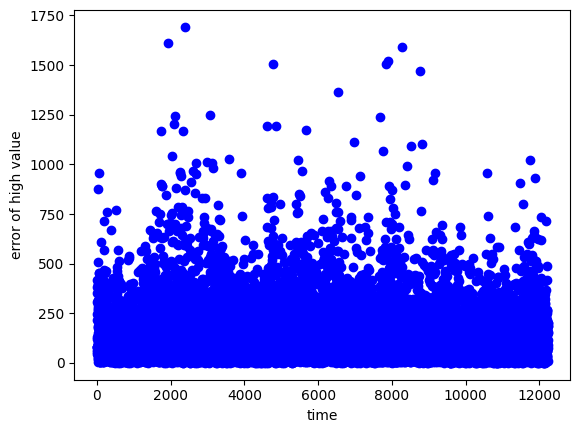

In [28]:
high = dataset.iloc[:, 0].values
plt.scatter(x=x, y=high, c='blue')
plt.xlabel('time')
plt.ylabel('error of high value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [29]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 100:
        counterHigh += 1
print(counterHigh)

4930


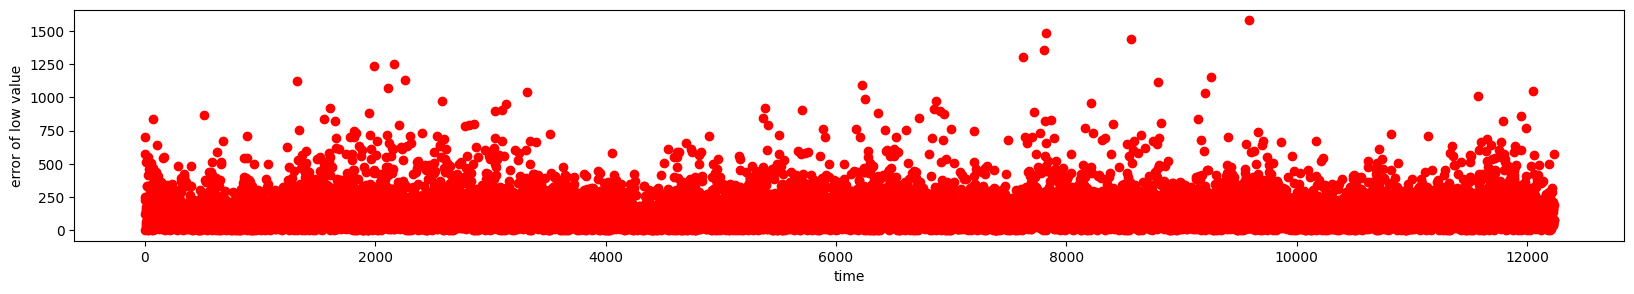

In [30]:
low = dataset.iloc[:, 1].values
plt.scatter(x=x, y=low, c='red')
plt.xlabel('time')
plt.ylabel('error of low value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [31]:
counterLow = 0
for i in range(len(low)):
    if low[i] < 100:
        counterLow+=1
print(counterLow)

5495


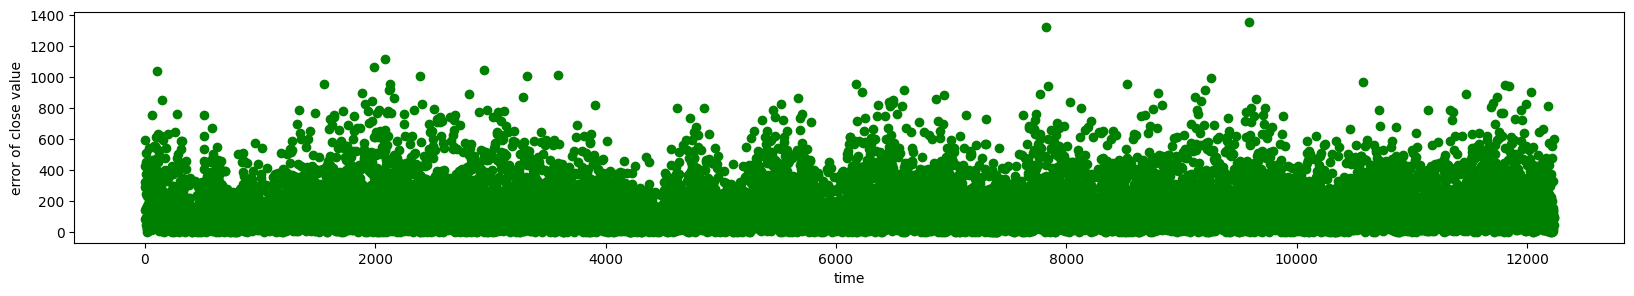

In [32]:
close = dataset.iloc[:, 2].values
plt.scatter(x=x, y=close, c='green')
plt.xlabel('time')
plt.ylabel('error of close value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [33]:
counterClose = 0
for i in range(len(close)):
    if close[i] < 100:
        counterClose+=1
print(counterClose)

4611


In [34]:
print("percent of under 100 for high is " + str((counterHigh/len(high))*100))
print("percent of under 100 for low is " + str((counterLow/len(low))*100))
print("percent of under 100 for close is " + str((counterClose/len(close))*100))

percent of under 100 for high is 40.297531469674674
percent of under 100 for low is 44.915808402811834
percent of under 100 for close is 37.69004413928396


In [35]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 200:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 200:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 200:
        counterClose+=1
print("percent of under 200 for high is " + str((counterHigh/len(high))*100))
print("percent of under 200 for low is " + str((counterLow/len(low))*100))
print("percent of under 200 for close is " + str((counterClose/len(close))*100))

percent of under 200 for high is 70.5165931011934
percent of under 200 for low is 75.46182769331372
percent of under 200 for close is 64.99918260585254


In [36]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 150:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 150:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 150:
        counterClose+=1
print("percent of under 150 for high is " + str((counterHigh/len(high))*100))
print("percent of under 150 for low is " + str((counterLow/len(low))*100))
print("percent of under 150 for close is " + str((counterClose/len(close))*100))

percent of under 150 for high is 56.915154487493865
percent of under 150 for low is 62.30995586071604
percent of under 150 for close is 52.542095798594076


In [37]:
dataset

,high error,low error,close error
0,82.369141,227.470703,292.396484
1,418.931641,577.470703,82.435547
2,46.878906,3.261719,424.240234
3,78.365234,118.943359,326.828125
4,308.623047,698.943359,596.828125
...,...,...,...
12229,90.879883,214.383789,142.631836
12230,149.731445,73.330078,96.606445
12231,202.295898,571.266602,598.340820
12232,200.047852,192.591797,90.486328
